In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from matplotlib import cm


In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [4]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1731,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,174,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,46,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_can.rename(columns={
    "OdName" : "country",
    "AreaName" : "continent",
    "RegName" : "region"
}, inplace=True)

In [6]:
df_can.drop(["Type", "Coverage","AREA", "REG","DEV"], axis=1, inplace=True)

In [7]:
df_can["total"] = df_can.sum(axis=1)

In [8]:
df_can.isnull().sum()

country          0
continent        0
region           0
DevName          0
1980             0
1981             0
1982             0
1983             0
1984             0
1985             0
1986             0
1987             0
1988             0
1989             0
1990             0
1991             0
1992             0
1993             0
1994             0
1995             0
1996             0
1997             0
1998             0
1999             0
2000             0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
Unnamed: 43    195
Unnamed: 44    195
Unnamed: 45    195
Unnamed: 46    195
Unnamed: 47    195
Unnamed: 48    195
Unnamed: 49    195
Unnamed: 50    195
total            0
dtype: int64

In [9]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [10]:
df_can.drop(['Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50'], axis=1, inplace=True)

In [11]:
df_can

,country,continent,region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699.0
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439.0
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6.0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146.0
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985.0
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677.0


In [12]:
df_can.set_index("country", inplace = True)

In [13]:
df_can

,continent,region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146.0
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985.0


In [14]:
df_can.index.name=None

In [15]:
df_can["total"].astype(int)

Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: total, Length: 195, dtype: int32

In [16]:
df_can.columns = list(map(str, df_can.columns))

In [17]:
df_can.columns

Index(['continent', 'region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'total'],
      dtype='object')

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [19]:
mpl.style.use(['seaborn-white'])

In [20]:
dfipc = df_can.loc[['India', 'Pakistan', 'China'], years]

In [21]:
dfipc

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [34]:
dfipc['total'] = dfipc.iloc[:,0:].sum(1)

In [35]:
dfipc

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904.0
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600.0
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962.0


In [36]:
dfipc['total'].astype(int)

India       691904
Pakistan    241600
China       659962
Name: total, dtype: int32

#### calculating total values and individual proportions

In [37]:
total_values = dfipc['total'].sum()

In [38]:
category_proportions = dfipc['total']/total_values

In [39]:
category_proportions

India       0.434213
Pakistan    0.151619
China       0.414168
Name: total, dtype: float64

#### Defining the size of the waffle chart

In [40]:
height = 10
width = 20

size = height*width

In [42]:
print(f'The total number of tiles in the waffle chart is {size}.')

The total number of tiles in the waffle chart is 200.


#### Obtaining number of tiles for every country in the waffle chart

In [44]:
num_tiles_p_cat = (size * category_proportions).round().astype(int)

In [45]:
num_tiles_p_cat

India       87
Pakistan    30
China       83
Name: total, dtype: int32

#### Creating the matrix for empty waffle chart

In [79]:
waffle_chart = np.zeros((height, width), dtype=np.uint)

In [80]:
waffle_chart

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=uint32)

#### Defining the indices to loop through the waffle chart

In [81]:
tile_index = 0
category_index = 0

#### Populating the waffle chart

In [82]:
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(num_tiles_p_cat[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
            
print('waffle chart populated')

waffle chart populated


In [83]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]],
      dtype=uint32)

#### Creating the waffle chart

<Figure size 432x288 with 0 Axes>

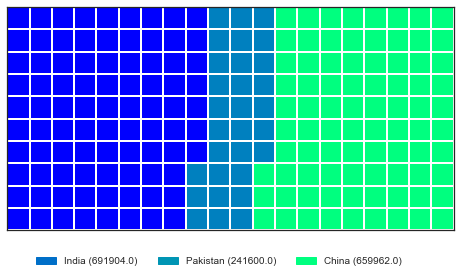

In [89]:
fig = plt.figure()

colormap = plt.cm.winter
plt.matshow(waffle_chart, cmap=colormap)
#Getting the axis
ax=plt.gca()

#Setting the minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#Adding gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(dfipc['total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#Creating Legend
legend_handles = []
for i, category in enumerate(dfipc.index.values):
    label_str = category + ' (' + str(dfipc['total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(dfipc.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

plt.show()